In [ ]:
!pip install -q numpy>=1.2.1

In [ ]:
!pip install -q lucid>=0.2.3

In [ ]:
import numpy as np

import ctypes.util
from lucid.misc.gl.glcontext import create_opengl_context

# Now it's safe to import OpenGL and EGL functions
import OpenGL.GL as gl
from OpenGL.GLU import *

# create_opengl_context() creates GL context that is attached to an
# offscreen surface of specified size. Note that rendering to buffers
# of different size and format is still possible with OpenGL Framebuffers.
#
# Users are expected to directly use EGL calls in case more advanced
# context management is required.
WIDTH, HEIGHT = 800,600
create_opengl_context((WIDTH, HEIGHT))
    
# OpenGL context is available here.

print(gl.glGetString(gl.GL_VERSION))
print(gl.glGetString(gl.GL_VENDOR)) 
#print(gl.glGetString(gl.GL_EXTENSIONS))

b'4.6.0 NVIDIA 460.32.03'
b'NVIDIA Corporation'


Enter radius: 200
Enter originX: 20
Enter originY: 20
How many circle: 36


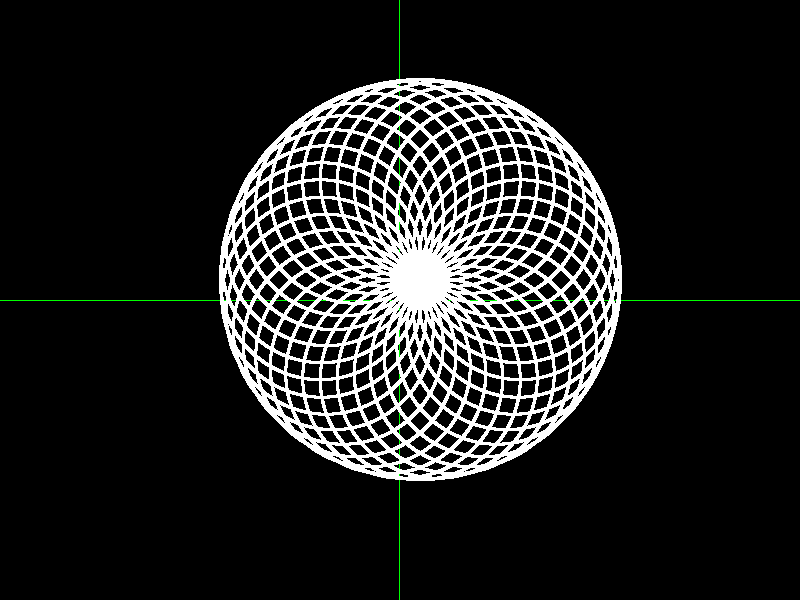

In [ ]:
from IPython.display import display
from PIL import Image

#from typing_extensions import ParamSpecKwargs
gl.glClear(gl.GL_COLOR_BUFFER_BIT)
import math
# Let's render something!
def point_in_colab(x,y):
  gl.glVertex2f(x/(WIDTH/2), y/(HEIGHT/2))
def colorChange(x,y,z):
  gl.glColor3f(x,y,z)
def drawAxis():
  gl.glColor3f(0, 255, 0)
  gl.glPointSize(5)
  gl.glBegin(gl.GL_LINES)
  point_in_colab(0,HEIGHT/2)
  point_in_colab(0,-HEIGHT/2)
  point_in_colab(WIDTH/2,0)
  point_in_colab(-WIDTH/2,0)
  gl.glEnd()

def draw_point(cordinates_list):
  gl.glColor3f(255, 255, 255)
  gl.glPointSize(3)
  gl.glBegin(gl.GL_POINTS)
  for item in cordinates_list:
    ordinate,abscissa = item
    point_in_colab(ordinate,abscissa)
  gl.glEnd()

def circle_origin(radius):
  d = 1-radius
  x = 0
  y = radius
  cordinates = []
  while x<=y:
    cordinates.append((x,y))
    if d>=0:
      d += 2 * x - 2*y + 5
      x += 1
      y -= 1
    elif d<0:
      d += 2 * x + 5
      x += 1
  return cordinates


def zone_converter_from_zero(cordinates,zone):#typo from zone one
  new_points = []
  if zone == 0:
    for item in cordinates:
      x,y = item
      new_points.append((y,x))
    return new_points
  elif zone == 1:
    return cordinates
  elif zone == 2:
    for item in cordinates:
      x,y = item
      new_points.append((-x,y))
    return new_points
  elif zone == 3:
    for item in cordinates:
      x,y = item
      new_points.append((-y,x))
    return new_points
  elif zone == 4:
    for item in cordinates:
      x,y = item
      new_points.append((-y,-x))
    return new_points
  elif zone == 5:
    for item in cordinates:
      x,y = item
      new_points.append((-x,-y))
    return new_points
  elif zone == 6:
    for item in cordinates:
      x,y = item
      new_points.append((x,-y))
    return new_points
  elif zone == 7:
    for item in cordinates:
      x,y = item
      new_points.append((y,-x))
    return new_points


def draw_all_zone_points(cordinates,originX,originY):
  for zone in range(8):
    zone_points = zone_converter_from_zero(cordinates,zone)
    draw_point(changeOrigin(originX,originY,zone_points))
def changeOrigin(h,k,points):
  newPoints = []
  for point in points:
    x,y = point
    x+= h
    y+=k
    newPoints.append((x,y))
  return newPoints
def scale_circle(cordinates,factor):
  output= []
  for x,y in cordinates:
    output.append((x*factor,factor*y))
  return output


drawAxis()
radius = int(input("Enter radius: "))
originX = int(input("Enter originX: "))
originY = int(input("Enter originY: "))
num = int(input("How many circle: "))
degree = 360 // num
zone1_points=circle_origin(radius)#midpoint cirle algorithm
draw_all_zone_points(zone1_points,originX,originY)
scaled_zone1_points =scale_circle(zone1_points,0.5)

for deg in range(degree,361,degree):
  costheta = math.cos(math.radians(deg))
  sintheta = math.sin(math.radians(deg))
  c_x,c_y = ((radius) * costheta)/2,((radius) * sintheta)/2
  draw_all_zone_points(scaled_zone1_points,originX+c_x,originY+c_y)

img_buf = gl.glReadPixelsub(0, 0, WIDTH, HEIGHT, gl.GL_RGB, gl.GL_UNSIGNED_BYTE)
img = np.frombuffer(img_buf,np.uint8).reshape(HEIGHT, WIDTH, 3)[::-1]
display(Image.fromarray(img,'RGB'))


In [8]:
from OpenGL.GL import *
from OpenGL.GLUT import *
from OpenGL.GLU import *
import math
import random

def draw_points(points,coloring):
  x,y,z = coloring
  glColor3f(x,y,z)
  glPointSize(3)
  glBegin(GL_POINTS)
  for point in points:
    glVertex2f(point[0], point[1])
  glEnd()

def draw_all_zone_points(cordinates,originX,originY,coloring):
  toPrint=[]
  for zone in range(8):
    zone_points = zone_converter_from_zero(cordinates,zone)
    toPrint.extend(changeOrigin(originX,originY,zone_points))
  draw_points(toPrint,coloring)


def circle_origin(radius):
  d = 1-radius
  x = 0
  y = radius
  cordinates = []
  while x<=y:
    cordinates.append((x,y))
    if d>=0:
      d += 2 * x - 2*y + 5
      x += 1
      y -= 1
    elif d<0:
      d += 2 * x + 5
      x += 1
  return cordinates

def zone_converter_from_zero(cordinates,zone):#typo from zone one
  new_points = []
  if zone == 0:
    for item in cordinates:
      x,y = item
      new_points.append((y,x))
    return new_points
  elif zone == 1:
    return cordinates
  elif zone == 2:
    for item in cordinates:
      x,y = item
      new_points.append((-x,y))
    return new_points
  elif zone == 3:
    for item in cordinates:
      x,y = item
      new_points.append((-y,x))
    return new_points
  elif zone == 4:
    for item in cordinates:
      x,y = item
      new_points.append((-y,-x))
    return new_points
  elif zone == 5:
    for item in cordinates:
      x,y = item
      new_points.append((-x,-y))
    return new_points
  elif zone == 6:
    for item in cordinates:
      x,y = item
      new_points.append((x,-y))
    return new_points
  elif zone == 7:
    for item in cordinates:
      x,y = item
      new_points.append((y,-x))
    return new_points

def changeOrigin(h,k,points):
  newPoints = []
  for point in points:
    x,y = point
    x+= h
    y+=k
    newPoints.append((x,y))
  return newPoints

def scale_circle(cordinates,factor):
  output= []
  for x,y in cordinates:
    output.append((x*factor,factor*y))
  return output

def Draw_ME_Circle(radius,origin):
    # radius = int(input("Enter radius: "))
    # origin = input("Enter origin: ")
    num = 8
    degree = 360 // num
    # origin = origin.split(",")
    originX = int(origin[0])
    originY = int(origin[1])
    coloring = [(0,0,0),(255,255,255),(255,0,0),(0,255,0),(0,0,255),(255,255,0),(0,255,255),(255,0,255),(192,192,192),(0,128,0),(0,128,128)]
    zone1_points=circle_origin(radius) #midpoint cirle algorithm
    draw_all_zone_points(zone1_points,originX,originY,coloring[0])
    scaled_zone1_points = scale_circle(zone1_points,0.5)
    circ= 1
    for deg in range(degree,361,degree):
      circ += 1
      costheta = math.cos(math.radians(deg))
      sintheta = math.sin(math.radians(deg))
      c_x,c_y = ((radius) * costheta)/2,((radius) * sintheta)/2
      draw_all_zone_points(scaled_zone1_points,originX+c_x,originY+c_y,coloring[circ])




def iterate():
    glViewport(0, 0, 500, 500)
    glMatrixMode(GL_PROJECTION)
    glLoadIdentity()
    glOrtho(0.0, 500, 0.0, 500, 0.0, 1.0)
    glMatrixMode(GL_MODELVIEW)
    glLoadIdentity()


def showScreen():
    glClear(GL_COLOR_BUFFER_BIT | GL_DEPTH_BUFFER_BIT)
    glLoadIdentity()
    iterate()
    # radius = int(input("Enter radius: "))
    # origin = input("Enter origin: ")
    Draw_ME_Circle(50,(250,250))
    
    glutSwapBuffers()

# radius = int(input("Enter radius: "))
# origin = input("Enter origin: ")
glutInit()
glutInitDisplayMode(GLUT_RGBA)
glutInitWindowSize(500, 500)  # window size
glutInitWindowPosition(0, 0)
# radius = int(input("Enter radius: "))
# origin = input("Enter origin: ")
wind = glutCreateWindow(b"OpenGL Coding Practice")  # window name
glutDisplayFunc(showScreen)
glutMainLoop()



[(300, 250), (300, 251), (300, 252), (300, 253), (300, 254), (300, 255), (300, 256), (299, 257), (299, 258), (299, 259), (299, 260), (299, 261), (298, 262), (298, 263), (298, 264), (297, 265), (297, 266), (297, 267), (296, 268), (296, 269), (295, 270), (295, 271), (295, 272), (294, 273), (293, 274), (293, 275), (292, 276), (292, 277), (291, 278), (290, 279), (290, 280), (289, 281), (288, 282), (287, 283), (286, 284), (285, 285)]
[(250, 300), (251, 300), (252, 300), (253, 300), (254, 300), (255, 300), (256, 300), (257, 299), (258, 299), (259, 299), (260, 299), (261, 299), (262, 298), (263, 298), (264, 298), (265, 297), (266, 297), (267, 297), (268, 296), (269, 296), (270, 295), (271, 295), (272, 295), (273, 294), (274, 293), (275, 293), (276, 292), (277, 292), (278, 291), (279, 290), (280, 290), (281, 289), (282, 288), (283, 287), (284, 286), (285, 285)]
[(250, 300), (249, 300), (248, 300), (247, 300), (246, 300), (245, 300), (244, 300), (243, 299), (242, 299), (241, 299), (240, 299), (

In [5]:
lst =[]
lst.extend([(2,4)])
print(lst)

[(2, 4)]
